#  <center>![WhatsApp%20Image%202017-09-25%20at%2014.32.13.jpeg](attachment:WhatsApp%20Image%202017-09-25%20at%2014.32.13.jpeg)</center>

# <h1 align="center">**Linear Regression** </h1>

# # Program so far

# ***

#  Whirlwind introduction to Python - sharpen your grey cell and pull some cool tricks off your sleve after all your are a pythonista - Albiet a budding one :) 


# * Introduction to Machine Learning - You can tell a classification task from a clustering 


# * Basic Probability & Descriptive Stats - You are at peace with Statistics (Hopefully !)


# * Steps involved in solving an end-to-end ML problem - starting it.


 
#  
#  

# # Agenda for the Day
# ***
# * Understand the intuition behind Linear Regression
# * Understand the Linear Regression Cost Function
# * Understand the Linear Regression using Gradient Descent Algorithm
# * Introduction to Linear Regression in sklearn
# * Learn about the assumptions in Linear Regression Algorithm
# * Evaluating Metrics for Regression



# We have tried understanding and predicting the price of a house in NY using various statistical techniques so far.
# 
# 
# **These included both descriptive and univariate inferential statistics methodologies.**
# 

# <div class="alert alert-block alert-success">Now let's take a step forward and make our first prediction!</div>


# In order to learn to make predictions, it is important to learn what is a Predictor.


#  So what is a predictor? (1/4)

# How could you say if a person went to tier 1, 2 or 3 college in America?


# Simple, if someone is determined to pursue a Bachelor's degree, Higher SAT scores (or GPA) leads to more college admissions! 

# The graph below depicts Cornell's acceptance rate by SAT scores and many Universities show similar trends

# 
# 
# <center><img src="attachment:sats_2014_graph.gif" alt="Drawing" style="width: 700px;"/></center>

#  What is a predictor? (2/4)

# We also know that if we keep on drinking more and more beers, our Blood-Alcohol Content(BAC) rises with it. 
# 
# The graph below depicts just that, know your limits! 

# <center><img src="attachment:BAC.png" style="width: 1000px;"/></center>

# What is a predictor? (3/4)

# Think about the relationship between the Circumference of a Cirle and it's diameter. What happens to the former whilst the latter increases? 

# What is a predictor? (4/4)

# The moral of the story is there are factors that influence the outcome of the variable of our interest. 

# * SAT score --> University acceptance rate
# * Number of beers --> Body alcohol level
# * Diameter --> Circumference
# 
# These variables are known as **predictors** and the variable of interest is known as the **target variable**.

#  So, how much would a house actually cost?

# Let's resume to our discussion on prices of house in NY.
# 
# Here, our target variable would be ____________
# 
#  What could be the predictors for our target variable? **

# Let's roll with area of the house
# 
# We would want to see if the price of a house is really affected by the area of the house
 
# Intuitively, we all know the outcome but let's try to understand why we're doing this

# Let's have a look at the data

# - Now, let's have a look at the data 
#  - Every row displays the Price and Area of each house



In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\KARM\Desktop\python\Data Set\house_prices.csv")
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000



# ## Plotting our data
# ***
#  - Getting some motivation from Exploratory Data Analysis, what's intriguing is how this data will look when we plot it 
#  - Starting simple, let's just check how our data looks like in a scatter plot where: 
#    - Area is taken along the X-axis
#    - Price is taken along the Y-axis

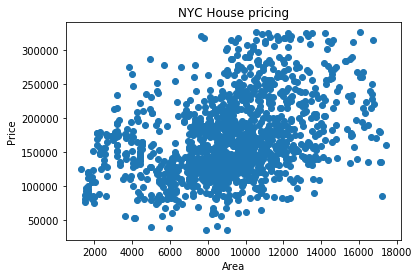

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#   Thinking out loud
#  
#   - By seeing our data above, we can see, an upward trend in the House Prices as the Area of the house increases
#   - We can say that as the Area of a house increases, it's price increases too.
#   - Now, let's say we want to predict the price of the house whose area is 14000 sq feet, how should we go about it?

# ## Fitting a Line On the Scatter Plot
# ***
#  - Intuitively, we can just draw a straight line that would "capture" the trend of area and house price, and predict house price from that line.
# 
# <div class="alert alert-block alert-success">**Let's try and fit a line through all these points!**</div>

#  What's your prediction?

# ## Which line to choose?
# 
# As you saw, there are many lines which would seem to be fitting reasonably well.
# 
# 
# consider following lines,
# 
# 
# $$ price = 30000 + 15∗area\\
# price=10000 + 17 ∗ area\\
# price= 50000 + 12 ∗ area
# $$
# 
# <div class="alert alert-block alert-success">**Let's try and plot them and see if they are a good fit**</div>


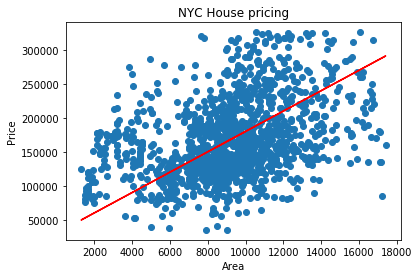

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



# ## In Class Activity :
# ***
# Plot a line fitting our 'Sales Price' data for $$ price=10000 + 17 ∗ area $$


# plot "price=10000 + 17 ∗ area" line

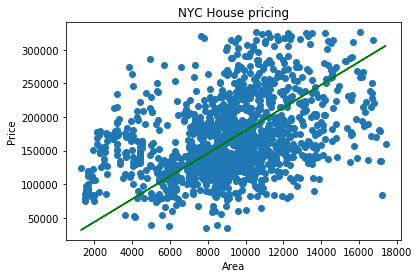

In [23]:

plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 10000 + 17*data.LotArea,'g-' )
# your code here


plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



# ## In Class Activity :
# ***
# Plot a line fitting our 'Sales Price' data for $$ price= 50000 + 12 ∗ area $$

# In[34]:


# plot "price= 50000 + 12 ∗ area" line


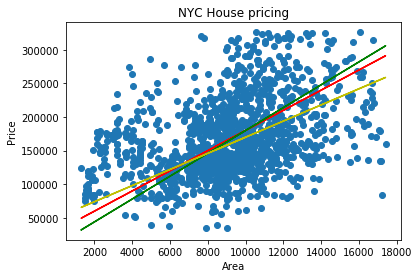

In [24]:
plt.scatter(data.LotArea, data.SalePrice)

# Your code here
plt.plot(data.LotArea, 30000 + 15*data.LotArea,'r-' )
plt.plot(data.LotArea, 10000 + 17*data.LotArea,'g-' )
plt.plot(data.LotArea, 50000 + 12*data.LotArea,'y-' )

plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



# ## Which line to choose?
# ***
# Seems like all of them are a good fit for the data. Let's plot of them in a single plot and see how that pans out.


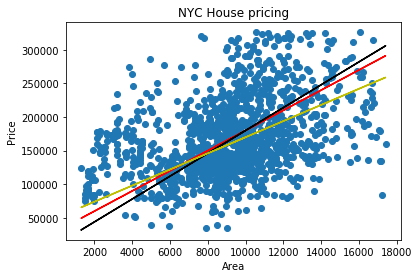

In [25]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()




# ## Which line to choose?
# ***
# As you can see although all three seemed like a good fit, they are quite different from each other. In result, they will result in very different predictions.
# 
# For example, for house area = 9600, the predictions for red, black and yellow lines are


In [26]:

# red line: 
print("red line:", 30000 + 15*9600)

red line: 174000


In [27]:
# black line: 
print("black line:", 10000 + 17*9600)

black line: 173200


In [28]:
# yellow line: 
print("yellow line:", 50000 + 12*9600)

yellow line: 165200




# black line:

# yellow line:


# <img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
# ## Which line to choose?
# ***
# As you can see the price predictions are varying from each other significantly. So how do we choose the best line?
# 
# Well, we can define a function that measures how near or far the prediction is from the actual value.
# 
# If we cosider the actual and predicted values as points in space, we can just calculate the distance between these two points!

# This function is defined as:
# 
# $$(Y_{pred}-Y_{actual})^2$$
# 
# The farther the points, more the the distance and more the cost!
# 
# 
# It is known as the **cost function** and since this function captures square of distance, it is known as the **least-squares cost function**. 
# 
# 
# The idea is to **minimize** the cost function to get the best fitting line.

# ## Introducing Linear Regression:
# ***
# 
# Linear regression using least squared cost function is known as **Ordinary Least Squared Linear Regression**. 
# 
# This allows us to analyze the relationship between two quantitative variables and derive some meaningful insights

# ## KYLR (Know your Linear Regression)!
# ***
# Great! now before moving forward, let's try to put the discussion we have had so far into a more formal context. Let's start by learning some terminologies.
#  
#  - Here, we're trying to Predict the Price of the House using the value of it's Area 
#  - Thus, Area is the **Independent Variable** 
#  - Price is the **Dependent Variable**, since the value of price is dependent on the value of area
#  
# ***
# ![linear_regression_4.jpg](attachment:linear_regression_4.jpg)
#  

# ## KYLR (Know your Linear Regression)!
# ***
# 
# - Since we're using **only 1** predictor (Area) to predict the Price, this method is also called **Univariate Regression**
# - But more often than not, in real problems, we utilize 2 or more predictors. Such a regression is called **Muiltivariate Regression**. More on this later! 

# ## KYLR (Know your Linear Regression)!
# ***
# 
# We will start to use following notations as it helps us represent the problem in a concise way.
# 
# * $X^{_i}$  denotes the predictor(s) - in our case it's the Area
# * $y^{(i)}$  denotes the response variable (Price)

# ## KYLR (Know your Linear Regression)!
# ***
# A pair ($x^{(i)}$ ,  $y^{(i)}$) is called a training example.
# 
# 
# For example, 2nd training example, ( x(2)  ,  y(2) ) corresponds to  ( _._._._ , _._._._ )  (Fill in the blanks above by having a look at your data!)
# 

# ## KYLR (Know your Linear Regression)!
# ***
# Let's consider that any given dataset contains **"m"** training examples or Observations
# 
# { $x^{(i)}$  , $y^{(i)}$ ; i = 1, . . . , m} — is called a **training set**.
# 
# In this example, m = 1460 (Nos. of row)

# ## Cost Function:
# ***
# Ok, so now that these are out of our way, let's get started with the real stuff.
# 
# - An ideal case would be when all the individual points in the scatter plot fall directly on the line OR a straight line passes through all the points in our plot, but in reality, **that rarely happens**
#   
# - We can see that for a Particular Area, there is a difference between Price given by our data point (which is the correct observation) and the line (predicted observation or **Fitted Value**)
# 
# - So how can we Mathematically capture such differences and represent it? 

# ### Cost Function
# ***
# We choose  θs so that predicted values are as close to the actual values as possible
# 
# We can define a mathematical function to capture the difference between the predicted and actual values.
# 
# This function is known as the cost function and denoted by $J(θ)$

# ### Cost function:
# ***
# 
# $$\frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$
# 
# * $\theta$ is the coefficient of 'x' for our linear model intuitively. It measures how much of a unit change of 'x' will have an effect on 'y'
# - Here, we need to figure out the values of intercept and coefficients so that  the cost function is minimized.
# - We do this by a very important and widely used Algorithm: **Gradient Descent**

# <img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
# 
#  #### [Anscombe's Quartet](http://students.brown.edu/seeing-theory/regression/index.html#first)
#  #### [What is Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
#  ***

# In[7]:



In [29]:

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BR9h47Jtqyw?start=188" frameborder="0" allowfullscreen></iframe>')


# ### Gradient Descent Intuition
# ***
#  - So, we want to choose θ so as to minimize J(θ)
#  - Gradient Descent is a search Algorithm that starts with some “initial guess” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully we converge to a value of θ that minimizes J(θ)
# 

#  - It repeatedly performs an update on θ as shown: 
#  
#     ![cost2.png](attachment:cost2.png)
#     
#     
# 

# ### Gradient Descent Intuition
# ***
#   - Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J

# <img src="../images/icon/Maths-Insight.png" alt="Math-Insight" style="width: 100px;float:left; margin-right:15px"/>
# <br />
# ### Gradient Descent Optimization (Optional) 
# ***
# <br />
# Gradient in the previous  eq.(1) can be simplified as following
# 
# ![GD2.png](attachment:GD2.png)
# 

# ### Gradient Descent Optimization (Optional) 
# ***
# Hence, for a single training example, eq.(1) becomes
# 
# ![GD3.png](attachment:GD3.png)
# 

# For the training set, eq.(1) becomes
# 
# ![GD4.png](attachment:GD4.png)
# 
# Here,  xj is the corresponding predictor for  θj.
# 
# For example, predictor corresponding to  θ1  and 2nd training example,  x(2)1  is 24.
# 
# Value for all  x(i)0  is equal to 1.


In [30]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WnqQrPNYz5Q?start=10&end=155" frameborder="0" allowfullscreen></iframe>')



# ## Linear Regression in sklearn
# ***
# sklearn provides an easy api to fit a linear regression and predict values using linear regression
# 
# Let's see how it works

# ## Linear Regression is not always useful
# ![linear_regression_2.jpg.png](attachment:linear_regression_2.jpg.png)


In [36]:

y.shape

(1326,)

In [37]:


X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice


In [38]:

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:

# Predicting the Test set results
y_pred = regressor.predict(X)

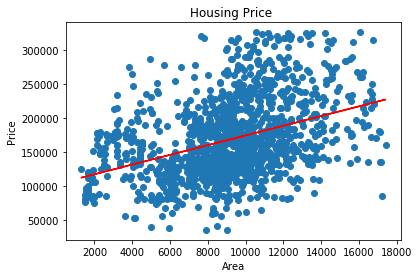

In [40]:

# Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



# ## Plotting the Best Fitting Line

# In[12]:



# ## Prediction made Easy
# ***
# 
#  - Visually, now we now have a nice approximation of how Area affects the Price 
#  - We can also make a prediction, the easy way of course! 
#  - For example: If we want to buy a house of 14,000 sq. ft, we can simply draw a vertical line from 14,000 up to our Approximated Trend line and continue that line towards the y-axis
#  - We can see that for a house whose area ~ 14,000 we need to pay ~ 2,00,000-2,25,000

# ## Gradient Descent Algorithm & Implementation in Python
# ***
# To get the optimal value of  θ , perform following algorithm known as the **Batch Gradient Descent Algorithm**
# 
# ![GD5.png](attachment:GD5.png)
# 

# ### Getting Started:
# ***
# 
# We have seen how Gradient Descent helps us to minimize the cost function. In this exercise we will learn to write functions to implement our own batch gradient descent algorithm for univariate linear regression! 
# 
# <div class="alert alert-block alert-success">You may want to revise and refer to the Steps of the algorithm from the slides to get a strong intuition on what your functions should look like
# </div>
# 
# <div class="alert alert-block alert-danger">You should not use any sklearn objects for the purpose of this exercise </div>

# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br />
# ## Python Implementation of Gradient Descent Algorithm
# ***
# 
# Let's start with calculating the error of a given linear regression model.
# We will consider univariate model so that
# $$y = theta * x + b$$
# 
# Let's write a function `error_calculator()` so that given `b`, `theta` and X and y, we can calculate the error.
# 
# The fucntion would look something like this:


In [4]:

import numpy as np

def error_calculator(b, theta, points):
    data = np.array(points)
    x = data[:,0]
    y = data[:,-1]
    y_predicted = theta * x + b
    error = np.sum((y - y_predicted)**2) / data.shape[0]
    return  error


# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# Now that we have calculated the mean square error, we can calculate the gradient.
# 
# We can write a function, that, given current parameters, calculates the gradeint.
# 
# Such a function would look like this:


In [5]:

def gradient(b_current, theta_current, points, learningRate):
    data = np.array(points)
    x = data[:, 0]
    y = data[:, 1]
    N = data.shape[0]
    b_gradient = -2 * np.sum(y - (theta_current * x + b_current)) / N
    theta_gradient = -2 * np.sum(x * (y - (theta_current * x + b_current))) / N
    new_b = b_current - (learningRate * b_gradient)
    new_theta = theta_current - (learningRate * theta_gradient)
    return new_b, new_theta



# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# Now that we have calculated the gradient, we need to find num_iterations
# 
# We can write a function, that, given current parameters, calculates the num_iteration and returns the list of calculated errors.
# 
# Such a function would look like this:


In [6]:
def gradient_descent(starting_b, starting_theta, points, learning_rate, num_iterations):
    b = starting_b
    theta = starting_theta
    b_list = []
    theta_list = []
    error_list = []
    for i in range(num_iterations):
        b, theta = gradient(b, theta, points, learning_rate)
        error = error_calculator(b, theta, points)
        b_list.append(b)
        theta_list.append(theta)
        error_list.append(error)
    return b_list, theta_list, error_list


In [7]:

points = np.genfromtxt(r"C:\Users\KARM\Desktop\python\Data Set\house_prices_multivariate.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 2 # initial y-intercept guess
initial_m = 6 # initial slope guess
num_iterations = 15

In [12]:
error_before = error_calculator(initial_b, initial_m, points)
b, theta, error = gradient_descent(initial_b, initial_m, points, learning_rate, num_iterations)
error_after = error_calculator(b[-1], theta[-1], points)


In [13]:
print(error_before,b, theta, error,error_after)


nan [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] nan


In [14]:
error_before = error_calculator(initial_b, initial_m, points)
b, theta, error = gradient_descent(initial_b, initial_m, points, learning_rate, num_iterations)
error_after = error_calculator(b[-1], theta[-1], points)



In [15]:

print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error_before))
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b[-1], theta[-1], error_after))


Starting gradient descent at b = 2, m = 6, error = nan
After 15 iterations b = nan, m = nan, error = nan



# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# 
# Next we need to plot '$\theta$'. So we write a function, that, given current parameters, plots the value to theta against iteration number.
# 
# This function would look something like this.


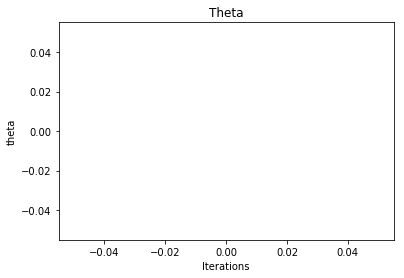

In [18]:

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(theta)
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.title("Theta")
plt.show()



# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# Next we need to plot 'b'. So we write a function, that, given current parameters, plots the value to 'b' against iteration number.
# 
# This function would look like this

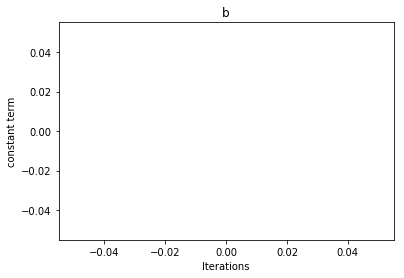

In [19]:
plt.plot(b)
plt.xlabel("Iterations")
plt.ylabel("constant term")
plt.title("b");



# <img src="../images/icon/Technical-Stuff.png" alt="Technical_Stuff" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# Next we need to plot 'errors'. So we write a function, that, given current parameters, plots the value to 'errors' against iteration number.
# 
# This function would look like this.


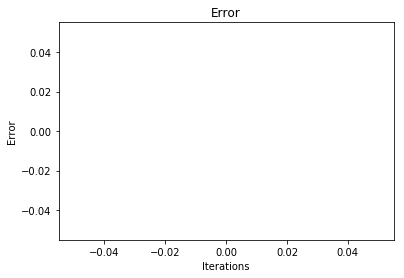

In [20]:

plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error");


# <img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# ## Multivariate Linear Regression
# ***
# - In Univariate Linear Regression we used only two variable. One as Dependent Variable and Other as Independent variable.
# - Now, we will use Multiple Dependent variable instead of one and will predict the Price i.e. Independent variable.
# - So, along with Area we will consider other variables as such as Pool


In [22]:
import pandas as pd
NY_Housing = pd.read_csv(r"C:\Users\KARM\Desktop\python\Data Set\house_prices_multivariate.csv")


In [23]:

# making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1]
y = NY_Housing.SalePrice

In [24]:

# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
NY_Housing.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
print("intercept:", regressor.intercept_)
print("coefficients of predictors:", regressor.coef_)



intercept: 310649.2600889208
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860420e-01 -6.61329855e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155080e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


# ## Predicting the price
# ***
# Now let's say I want to predict the price of a house with following specifications.


In [36]:
my_house = y[155]
my_house


228000

In [41]:
pred_my_house = regressor.predict(my_house.reshape(1, -1))
print("predicted value:", pred_my_house[0])



ValueError: shapes (1,1) and (34,) not aligned: 1 (dim 1) != 34 (dim 0)

In [35]:

print("actual value:", y[155])


actual value: 228000



# As you can see the predicted value is not very far away from the actual value.
# 
# Now let's try to predict the price for all the houses in the dataset.


In [43]:
# Predicting the results
y_pred = regressor.predict(X)
y_pred[:10]


array([223165.24462329, 193708.14702761, 216394.79759077, 197356.62505514,
       295125.75398645, 172516.96207705, 269477.13355182, 245198.81455232,
       168787.92247659,  87185.78920276])


# <div class="alert alert-block alert-success">Great! now, let's put the predicted values next to the actual values and see how good a job have we done!</div>


In [44]:

prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,223165.244623
1,181500,193708.147028
2,223500,216394.797591
3,140000,197356.625055
4,250000,295125.753986
5,143000,172516.962077
6,307000,269477.133552
7,200000,245198.814552
8,129900,168787.922477
9,118000,87185.789203




# ## Measuring the goodness of fit
# ***
# Must say we have done a reasonably good job of predicting the house prices.
# 
# However, as the number of predictions increase it would be difficult to manually check the goodness of fit. In such a case, we can use the cost function to check the goodness of fit.
# 
# <div class="alert alert-block alert-success">Let's first start by finding the mean squared error (MSE)</div>
# 


In [45]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)


1219044781.4947443

# <div class="alert alert-block alert-warning">**What do you think about the error value?**</div>
# 
# As you would notice the error value seems very high (in billions!). Why has it happened?
# 
# MSE is a relative measure of goodness of fit. We say that because the measure of goodness of MSE depends on the unit. 
# As it turns out, Linear regression depends on certain underlying assumptions. Violation of these assumptions result in poor results.
# 
# Hence, it would be a good idea to understand these assumptions.

# ## Assumptions in Linear Regression
# ***
# There are some key assumptions that are made whilst dealing with Linear Regression
# 
# These are pretty intuitive and very essential to understand as they play an important role in finding out some relationships in our dataset too! 
# 
# Let's discuss these assumptions, their importance and mainly **how we validate these assumptions**! 

# ### Assumptions in Linear Regression
# ***
# 1) **Linear Relationship Assumption: **
# 
# Relationship between response (Dependent Variables) and feature variables (Independent Variables) should be linear.
# 
#  - **Why it is important:**
# 
# <div class="alert alert-block alert-info">Linear regression only captures the linear relationship, as it's trying to fit a linear model to the data.</div>
# 

# 
#  - **How do we validate it:**
# 
# <div class="alert alert-block alert-success">The linearity assumption can be tested using scatter plots.</div>
# 

# ### Assumptions in Linear Regression
# ***
# ![slide%2052.png](attachment:slide%2052.png)

# ### Assumptions in Linear Regression
# ***
# 2) **Little or No Multicollinearity Assumption:**
# 
# It is assumed that there is little or no multicollinearity in the data.
# 
#  - **Why it is important:**
# 
# <div class="alert alert-block alert-info">It results in unstable parameter estimates which makes it very difficult to assess the effect of independent variables.</div>

# 
#  - **How to validate it:**
# 
# Multicollinearity occurs when the features (or independent variables) are not independent from each other. <div class="alert alert-block alert-success">Pair plots of features help validate.</div>
# 
# 

# ### Assumptions in Linear Regression
# ***
# 3) **Homoscedasticity Assumption: **
# 
# Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 
# 
#  - **Why it is important:**
# 
# <div class="alert alert-block alert-info">Generally, non-constant variance arises in presence of outliers or extreme leverage values.</div>

# 
#  - **How to validate:**
# 
# <div class="alert alert-block alert-success">Plot between  dependent variable vs error
# .</div>

# ### Assumptions in Linear Regression
# ***
# In an ideal plot the variance around the regression line is the same for all values of the predictor variable.
# In this plot we can see that the variance around our regression line is nearly the same and hence it satisfies the condition of homoscedasticity.
# ![slide%2055.png](attachment:slide%2055.png)

# ### Assumptions in Linear Regression
# ***
# 
# 4) **Little or No autocorrelation in residuals:**
# 
# There should be little or no autocorrelation in the data. 
# 
# Autocorrelation occurs when the residual errors are not independent from each other.

# - **Why it is important:**
# 
# <div class="alert alert-block alert-info">The presence of correlation in error terms drastically reduces model's accuracy. 
# 
# This usually occurs in time series models. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.</div>
# 
# 
#  - **How to validate:**
# <div class="alert alert-block alert-success">Residual vs time plot. look for the seasonal or correlated pattern in residual values.</div>
# 

# ### Assumptions in Linear Regression
# ***
# ![slide%2057.png](attachment:slide%2057.png)

# ![linear_regression_3.png](attachment:linear_regression_3.png)

# ### Assumptions in Linear Regression
# ***
# 
# 5) **Normal Distribution of error terms**
# 
#  - **Why it is important:**
#  
# <div class="alert alert-block alert-info">Due to the Central Limit Theorem, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a zero mean normal distribution. In practice, it seems to be so.
# </div>
# 
#  - **How to validate:**
# <div class="alert alert-block alert-success">You can look at QQ plot
# </div>

# ### Assumptions in Linear Regression
# ***
# ![slide%2059.png](attachment:slide%2059.png)

# ### Evaluation Metrics for Regression (1/3)
# ***
# - In Regression (and in other Machine Learning techniques) it's essential to know how good our model has performed. 

# ### Evaluation Metrics for Regression (2/3)
# ***
# - **Why? Doesn't the computer do it Automatically?** 
# 
#     - At first, it's easier to think that the Computer should automatically get the best model once we tell it what to do
#     
#     - This is not the case! We tell the computer what features/variables to use and what methods to use to fit the data
#     
#     - As models get more and more complicated (we'll get into this later) - we need to input "hyper-parameters" that essentially tell the computers how much of that quantity or what value we should use while **optimizing complicated parameters** and **cost functions**
#     

# 
# ### Evaluation Metrics for Regression (3/3)
# ***
#     - Thus, evaluating our model will help us know how well we're doing with our current selection of Features from the data, hyperparameters, etc. 
#     
# - There are three basic evaluation metrics for regression to check the goodness of fit.
# 
#     - Mean Absolute Error
#     - Root Mean square Error
#     - R-Square (Residual value)

# <img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# 
# ### Mean Absolute Error
# ***
# - The mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the actual vales. The mean absolute error is given by:
# $$MAE= \frac{1} {N}{\sum_{i=1}^N |y_{i} - \hat{y}_{i}|}$$
#  - We take the Absolute of the difference because our Predicted Values can be greater than or less than (resulting in a negative difference) 
#  - If we don't take the Mod then the result of all the differences would be a 0. Figuring out why is a good exercise! 

# <img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# ### Root Mean Square Error
# *** 
#  - The square root of the mean/average of the square of all of the error.
#  - RMSE is very commonly used and makes for an excellent general purpose error metric for numerical predictions.
#  - Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.
#  
#  $$RMSE = {\sqrt {\frac{1} {N}{\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} } }$$
# 
# 

#  - **Why are we squaring the Residuals and then taking a root?**
#      - Residuals are basically the difference between Actual Values & Predicted Values
#      - Residuals can be positive or negative as the predicted value underestimates or overestimates the actual value
#      - Thus to just focus on the magnitude of the error we take the square of the difference as it's always positive
#      
#    
#  - **So what is the advantage of RMS when we could just take the absolute difference instead of squaring**
#      - This **severely punishes large differences** in prediction. This is the reason why RMSE is powerful as compared to Absolute Error.
#      - Evaluating the RMSE and tuning our model to minimize it results in a more robust model

# 
# ### Interpretation of $R^2$
# ***
# - This is very important to understand, so read the following line multiple times if needed
#  - R - Square is a  **measure of the proportion of variability in the response that is explained by the regression model.**
#  
#  - Earlier, when the Blood Alcohol Content Data is fitted a Linear Model, the R-Square = 0.952
#     - This means that 95.2% of the the Variability in the data given to us is explained by our Linear Model, which is good! 
#     
#   - **R - Square values are always in the range of [0,1]**

# <img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# ## $R^2$ Intuition 
# ***
# ### Sum of Squares Decomposition and $R^2$:
#  - Before we get into calculating R^2, let's understand, what the different Sum of Squares for our model are: 
#    - In RMSE, we have already been introduced to Squared Residuals which is also called Error Sum of Squares (SSE) 
#    $$SSE = {\sum\limits_{i = 1}^N {(y_{i} - \hat{y}_{i} } })^{2} $$

# - Additionally, we have the Total Sum of Squares (SST) which is nothing but the Squared difference between the Actual Values (${y}_{i}$) and the Mean of our dataset ($\bar{y}_{i}$)   
#    $$SS(Total) = {\sum\limits_{i = 1}^N {(y_{i} - \bar{y}_{i} } })^{2} $$
# 
#    - And we also have Regression Sum of Squares, which is the squared difference between the Predicted values ($\hat{y}_{i}$) and the Mean ($\bar{y}_{i}$)
#       $$SS(Regression) = {\sum\limits_{i = 1}^N {(\hat{y}_{i} - \bar{y}_{i} } })^{2} $$

# <img src="../images/icon/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
# ## $R^2$ Intuition 
# ***
# Now, intuitively, we can see that: 
# 
#      SS(Total) = SS(Regression) + SSE 
#      
# Thus $R^2$ is defined as: 
# ![r%20square.png](attachment:r%20square.png)
# 
# However, in many cases, R^2 is not really a good metric and we use another metric known as **Adjusted R-Squared**

# <img src="../images/icon/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
# <br/>
# # In-session Recap Time
# ***
# * Understand how to make a prediction using predictors and fitting of a line
# * Understand the Linear Regression Cost Function
# * Understand the Linear Regression using Gradient Descent Algorithm 
# * Introduction to Linear Regression in sklearn
# * Learn about the assumptions in Linear Regression Algorithm
# * Evaluation Metric of your regression

# # Post Reads
# ***
# 
# 
# 
# * [Linear Regression in Python](https://medium.com/towards-data-science/simple-and-multiple-linear-regression-in-python-c928425168f9)
# * [Linear Regression using Gradient Descent Tutorial](https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/)
# * [CS229 - Andrew Ng, Stanford University](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
